In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [3]:
data = pd.read_csv('spare_parts_data.csv')

C:\Users\Prabha\AppData\Local\Temp\ipykernel_35020\2970599526.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('spare_parts_data.csv')


In [4]:
data.head()

,prt_id,part_name,used_qty,reservation_number,price,workorder_id,facility_code,equipment_code,workorder_type,workorder_type.1,workorder_priority,worm_losthours,worm_issuesummary,worm_failuredetails,worm_status,wo_creation_date,part_reservation_date
0,3338,FLANGED BEARING UCFL 205 2 BOLT,6.0,0,984.10,WO0656099,1007-MIXR-BN6,10007573,Breakdown,Mechanical,Critical,0.0,Dip tank roller bearing failure,new bearing fixing,Completed,2023-02-05 07:51:27.342,2023-02-05 07:51:31.547
1,9050,SERVO SYSTEM 68,210.0,0086479688,124.94,WO0632930,1007-MIXR-BN6,10007072,Abnormality Identification,Mechanical,Medium,0.0,Packer HPP oil level low,10Ltr oil top up in each HPP,Initiated,2022-12-17 19:49:57.173,2022-12-17 19:50:01.403
2,10194,HEXAGONAL NUT M30X2MM PITCH,2.0,0086675625,44.95,WO0635786,1007-MIXR-BN5,10019139,Abnormality Identification,Mechanical,Critical,0.0,Other Issue,NaN,Initiated,2022-12-24 12:29:58.083,2022-12-24 12:30:01.578
3,83871,Take-up unit stud M30 x 1000mm 10.9grade,1.0,0086675625,595.00,WO0635786,1007-MIXR-BN5,10019139,Abnormality Identification,Mechanical,Critical,0.0,Other Issue,NaN,Initiated,2022-12-24 12:29:58.083,2022-12-24 12:30:01.570
4,24215,Seal Kit FOR SMO (125x70x500),2.0,0088790096,4095.00,WO0673948,1007-TBCU-CUR-TR3,10040199,Breakdown,Mechanical,Critical,0.0,CYLINDER GLAND LEAK,followup,Completed,2023-03-07 09:32:16.151,2023-03-07 09:32:19.079


In [9]:
data_parts = data[data['part_name']=='NON COKING STEAM COAL']

data_parts_cleaned = data_parts[['prt_id','part_name','used_qty','price','part_reservation_date']]

In [11]:
data_parts_cleaned.index = pd.to_datetime(data_parts_cleaned['part_reservation_date'])

In [17]:
data_parts_cleaned['month'] = data_parts_cleaned.index.month
data_parts_cleaned['year'] = data_parts_cleaned.index.year
data_parts_cleaned['day'] = data_parts_cleaned.index.day

data_parts_cleaned = data_parts_cleaned.sort_index()

C:\Users\Prabha\AppData\Local\Temp\ipykernel_35020\211784315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_parts_cleaned['month'] = data_parts_cleaned.index.month
C:\Users\Prabha\AppData\Local\Temp\ipykernel_35020\211784315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_parts_cleaned['year'] = data_parts_cleaned.index.year
C:\Users\Prabha\AppData\Local\Temp\ipykernel_35020\211784315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [18]:
data_parts_cleaned

,prt_id,part_name,used_qty,price,part_reservation_date,month,year,day
part_reservation_date,,,,,,,,
2023-03-13 15:33:10.638,9156,NON COKING STEAM COAL,63.20,10149.72,2023-03-13 15:33:10.638,3,2023,13
2023-03-13 15:34:54.374,9156,NON COKING STEAM COAL,64.00,10149.72,2023-03-13 15:34:54.374,3,2023,13
2023-03-13 15:38:41.882,9156,NON COKING STEAM COAL,64.00,10149.72,2023-03-13 15:38:41.882,3,2023,13
2023-03-13 15:40:35.492,9156,NON COKING STEAM COAL,64.80,10149.72,2023-03-13 15:40:35.492,3,2023,13
2023-03-13 15:43:06.324,9156,NON COKING STEAM COAL,64.00,10149.72,2023-03-13 15:43:06.324,3,2023,13
...,...,...,...,...,...,...,...,...
2025-08-28 10:48:50.641,9156,NON COKING STEAM COAL,74.69,6921.71,2025-08-28 10:48:50.641,8,2025,28
2025-08-29 10:29:43.763,9156,NON COKING STEAM COAL,71.68,6903.06,2025-08-29 10:29:43.763,8,2025,29
2025-08-30 10:17:28.481,9156,NON COKING STEAM COAL,72.00,6885.09,2025-08-30 10:17:28.481,8,2025,30


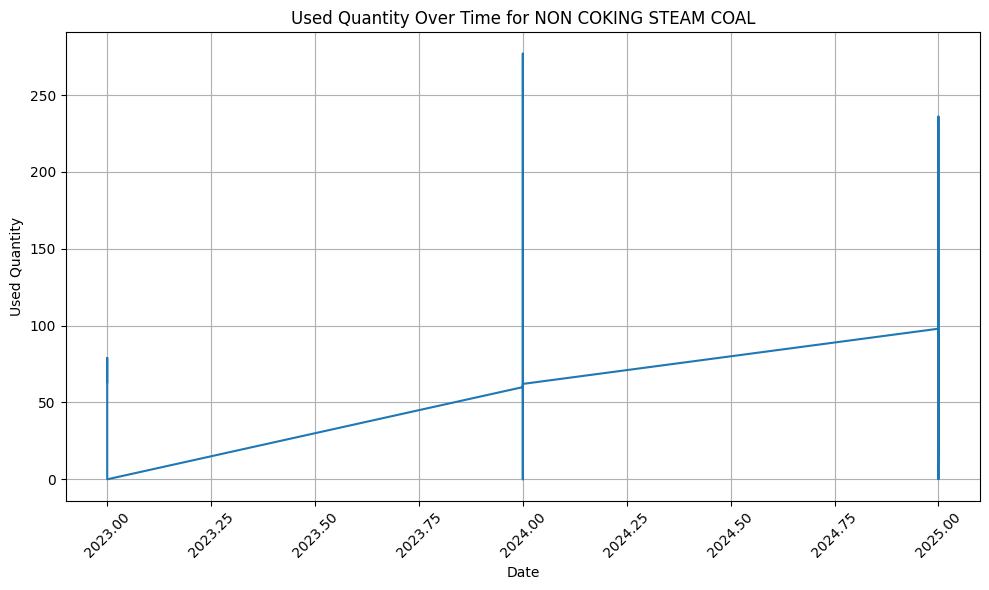

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data_parts_cleaned['year'], data_parts_cleaned['used_qty'], linestyle='-')
plt.title('Used Quantity Over Time for NON COKING STEAM COAL')
plt.xlabel('Date')
plt.ylabel('Used Quantity')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()